In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [30]:
def heun_ode(f, y0, xs, n_corrections = 10):
    """
    param f:
        좌변 상미분 방정식 y' = f(y, x)
    param y0:
        초기 값 y0 = y(x0)
    param xs:
        y 값을 추정하기 위한 x 값의 리스트
    param n_corrections:
        Corrector step의 반복 횟수
    """
   
    ys = [y0] * len(xs) # ys 리스트 만들어 주기 
        
    for i, (x_curr, x_next) in enumerate(zip(xs[:-1], xs[1:])):
        y_curr = ys[i]
        h = x_next - x_curr

        # predictor fomula as it is
        dydx = f(x_curr, y_curr)
        y_next = y_curr + h * dydx
        # print(type(y_next))
        # corrector fomula as it is
        for j in range(n_corrections):
            y_next = y_curr + 0.5 * h * (dydx + f(x_next, y_next)) 
            #y_next 값이 계속 들어가면서, 원하는 횟수 까지 계속해서 correct가 일어남.
            
        ys[i + 1] = y_next # 모든 y에 대하여 predictor과 corrector이 다 이루어져야 하니, 전체를 다하게끔.
    return ys    

In [3]:
[1] * 3


[1, 1, 1]

$y' = y$ 를 계산해보자. x는 $[0,2]$, 초기값 y(0) = 1

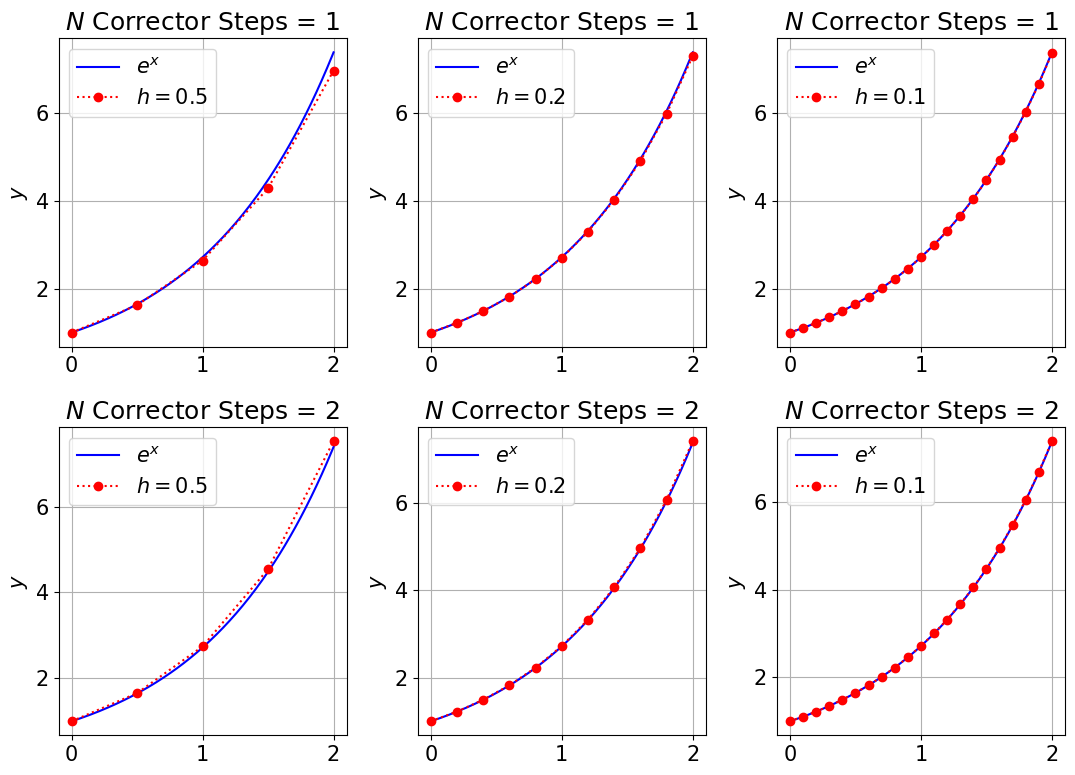

In [4]:
def f(x, y):
    return y

x_true = np.linspace(0, 2, 200)
y_true = np.exp(x_true)

plt.figure(figsize = [11, 8])

rows = [1, 2]
columns = [5, 11, 21]
for i, n_corrections in enumerate(rows):
    for j, n_divs in enumerate(columns):
        
        x = np.linspace(0, 2, n_divs) # n_divs = 5, 11, 21, 5, 11, 21 이렇게 반복됨.
        y = heun_ode(f, 1, x, n_corrections = n_corrections) # 1, 1, 1, 2, 2, 2 이렇게 반복됨.
        
        #같은 그래프를, 굳이 여러번 반복시킬 필요가 없다.
        #subplot으로 그림을 그릴 것인데, *map과 변하는 값 i, j를 이용하여 그림을 그려볼 수 있다.
        
        plt.subplot(*map(len, [rows, columns]), i*len(columns) + j + 1) 
        #print(*map(len, [rows, columns]), i * len(columns) + j + 1)
        #2, 3, 1 / 2, 3, 2 / 2, 3, 3 / 2, 3, 4 / 2, 3, 5 / 2, 3, 6 /
        #이렇게 나온다. 이는 직접 하나씩 넣어보면서 이해해보자. i, j 에 뭐가 들어가는지.
        
        
        
        plt.plot(x_true, y_true, "-b", x, y, "o:r")
        plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
        plt.title(f"$N$ Corrector Steps = {n_corrections}")
        plt.ylabel("$y$")
        plt.grid()
        
plt.tight_layout()
plt.show()

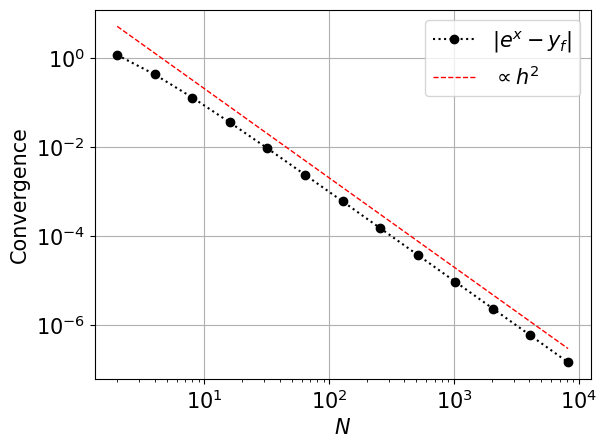

In [5]:
def f(x, y):
    return y

N = [2**i for i in range(1, 14)]
error = [
    abs(np.exp(2) - heun_ode(f, 1, np.linspace(0, 2, n + 1))[-1])
    for n in N
]

plt.figure()

plt.loglog(N, error, 'o:k', label = "$|e^x - y_f|$")
plt.loglog(N, [20 / n**2 for n in N], '--r', lw = 1, label = "$\\propto h^2$")
plt.grid()
plt.xlabel("$N$")
plt.ylabel("Convergence")
plt.legend()

plt.show()

In [6]:
for i, n_corrections in enumerate(rows):
    for j, n_divs in enumerate(columns):      
        print(n_corrections)

1
1
1
2
2
2


In [7]:
*map(len, [rows, columns]), i * len(columns) + j + 1 

(2, 3, 6)

In [8]:
a = [1, 2, 3]
b = [4, 5, 6]
map(len, [a, b])

In [9]:
def my_var_func(*args):
    print('The number of args is', len(args))
    for item in args:
        print(item)
my_var_func(1, 2, 3 ,4 ,5, 3)

The number of args is 6
1
2
3
4
5
3


In [10]:
map(len, [rows,columns])

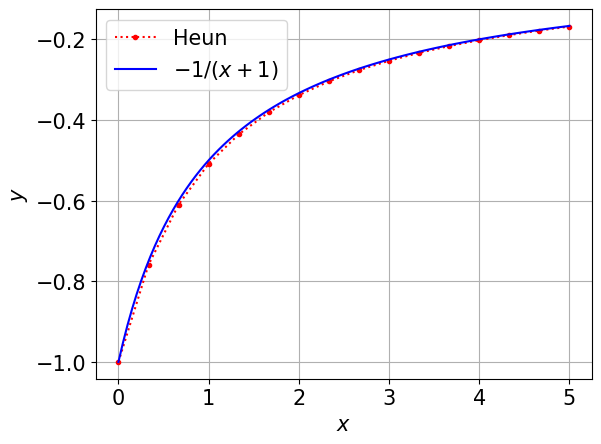

In [11]:
def f(x, y):
    return y ** 2

x = np.linspace(0,5, 16)
y = heun_ode(f, -1, x)

x_true = np.linspace(0, 5, 100)
y_true = -1 / (x_true + 1)

plt.figure()
plt.plot(x, y, ".:r", x_true, y_true, "-b")
plt.legend(["Heun", "$-1/(x + 1)$"])
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

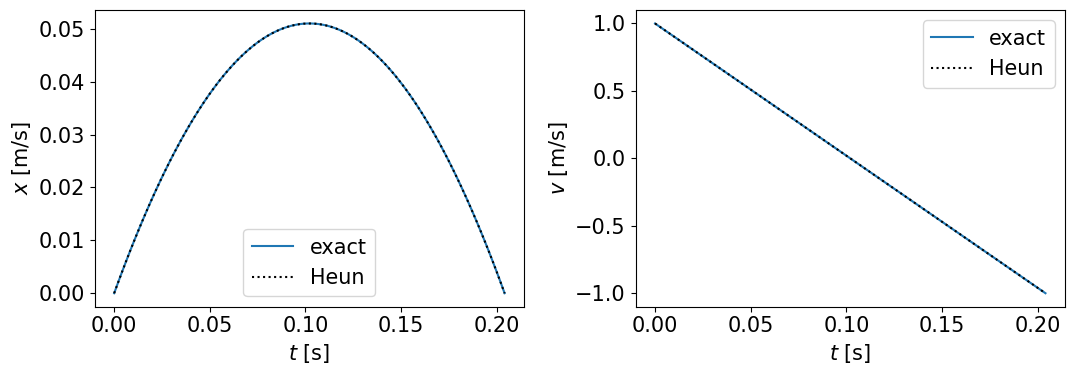

In [57]:
def F(t, Z): # F = [v, -g], Y = [x, v]
    F = [Z[1],-g]
    # print(Z)
    return np.array(F) # F 면 안된다. array type으로 형태를 변환해야함. 

    # Y 변수는 지정하지 않았는데 왜 존재하지? -> 이는 heun_ode에서 계산된 해를 보여주는 꼴이다.
    # 즉, 여기서 Y 변수는 heun_ode에서 정의된 값을 의미하고, 그 값은, 미분방정식으로 구한 해 이다. (미분하고자 하는 변수 Y: )
    # 따라서, v로 할경우의 해는 x이고 -g일 때는 v로 나온다.
    



g = 9.8 # m/s

t = np.linspace(0, 2/g, 100) #t의 범위, 100개 단위로 쪼갠다.
Y_0 = np.array([0, 1]) #초기 값을 각각 저장. 행렬로
x, v = zip(*heun_ode(F, Y_0, t))#추산한, x와 v의 값을 각각 넣어줌.
#Y = heun_ode(F, Y_0, t)


    
plt.figure(figsize = [11, 4])

plt.subplot(1, 2, 1)
plt.plot(t, -g/2*t**2 + t, '-', t, x, ':k')
plt.legend(["exact", "Heun"])
plt.xlabel("$t$ [s]")
plt.ylabel("$x$ [m/s]")

plt.subplot(1, 2, 2)
plt.plot(t, -g*t + 1, '-', t, v, ':k')
plt.legend(["exact", "Heun"])
plt.xlabel("$t$ [s]")
plt.ylabel("$v$ [m/s]")

plt.tight_layout()
plt.show()

In [60]:
heun_ode(F, Y_0, t)[-1][0]

-8.890457814381136e-17

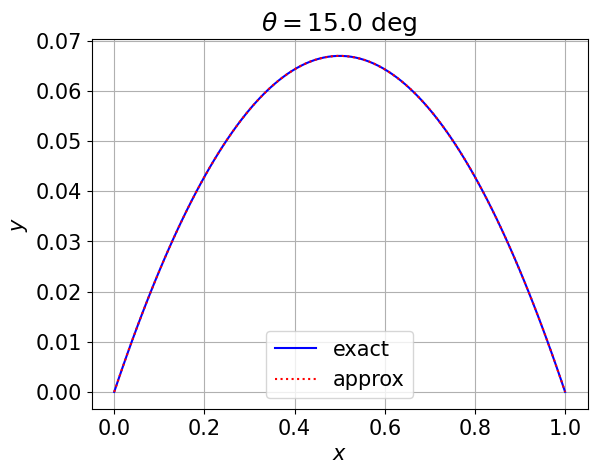

In [43]:
v02_g = 2
x_target = 1
theta = (np.pi/6) / 2

def F(theta, x, Y): # F = [z, dz/dx]  Y = [y, z]
    (y, z) = Y 
    F = [z, -1 / (v02_g * np.cos(theta)**2)]
    return np.array(F) # 미분공식 두개.행렬로 표현

x = np.linspace(0, x_target, 100)
y_exact = -x**2/(2 * v02_g * np.cos(theta)**2) + np.tan(theta)*x # 원래 주어진 솔루션

Y_0 = np.array([0, np.tan(theta)])
Y = heun_ode(lambda x, Y: F(theta, x, Y), Y_0, x)
y_approx = [y for y, z in Y]



plt.figure()

plt.plot(x, y_exact, "-b", label="exact")
plt.plot(x, y_approx, ":r", label="approx")
plt.legend()
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title(f"$\\theta = {theta / np.pi * 180}$ deg")

plt.show()


In [44]:
def secant_while(f, xinit, predicate):
    """Return the root calculated using the secant method.

    :param f:
        A function to solve.
    :param xinit:
        A pair of initial values for x.
    :param predicate:
        A callable that takes three arguments
            - i : the iteration count
            - xy : a pair of the midpoint and the function value in the current iteration
            - dx : the change of the x value
        and returns boolean:
            - If True, the search continues.
            - If False, the search terminates.
    """

    x0, x1 = map(float, xinit)
    f0, f1 = f(x0), f(x1)
    i, x2, f2 = 0, float("nan"), float("nan")
    
    def secant_root():
        nonlocal i, x2, f2
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        f2 = f(x2)
        i += 1
        return i, (x2, f2), x2 - x1

    while predicate(*secant_root()):
        x0, x1 = x1, x2
        f0, f1 = f1, f2
        
    return x2

In [87]:
v02_g      = 2         # meter
x_target   = 1         # meter
theta_init = np.pi / 6 # initial theta = 30deg

def F(theta, x, Y): # F = [z, dz/dx]
    (y, z) = Y      # Y = [y, z]
    F = [z, -1/(v02_g * np.cos(theta)**2)]
    return np.array(F)

def height_at_1m_away(theta): 
    x = np.linspace(0, x_target, 100)
    Yinit = np.array([0, np.tan(theta)]) # Y0 = [y0 = 0, z0 = tanθ]
    Y = heun_ode(lambda x, Y: F(theta, x, Y), Yinit, x)
    y = Y[-1][0] #최종 값, 최종으로 1일때의, 값
    return y

# we would like to solve height_at_1m_away(theta) = 0 m
theta_approx = secant_while(height_at_1m_away, (theta_init, theta_init - 0.1),
                            lambda i, xy, dx: abs(dx) >= 1e-7 * abs(xy[0]))

print("""
theta_approx = {:.2f} deg, error = {:e} deg
""".format(theta_approx * 180/np.pi, abs(theta_approx - np.pi / 12) * 180/np.pi))
print("원래 함수 = {}".format(height_at_1m_away(theta_init)* 180/np.pi))


theta_approx = 15.00 deg, error = 3.180555e-15 deg

원래 함수 = 13.981140554280078


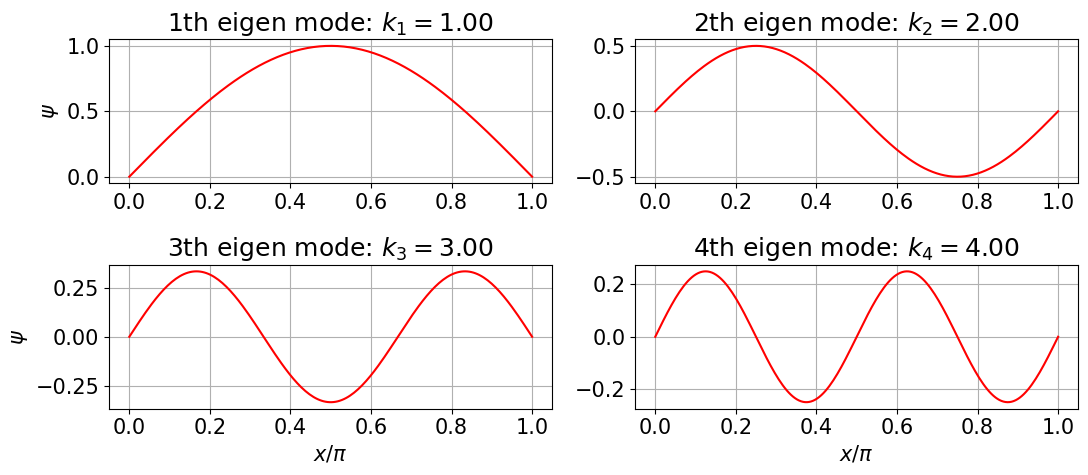

In [108]:
def F(k, x, Y):
    [psi, dpsi] = Y         # Y = [ psi   ,    dpsi/dx  ]
    F = [dpsi, -k**2 * psi] # F = [dpsi/dx, d^2 psi/dx^2]
    return np.array(F)






x, psi = None, None # these will hold the abscissa and the eigen function
def wave_function_at_L_away(k):
    global x, psi
    
    a      = 1 # the constant a can be any non-zero value
    Y_init = np.array([0, a])
    
    L      = np.pi
    n_divs = 200 # ideally, this number should be scaled by the eigenvalue,
                 # e.g., by int(np.round(k))
    x      = np.linspace(0, L, n_divs)
    Y      = heun_ode(lambda x, Y: F(k, x, Y), Y_init, x)
    
    # we are only interested in the wave function
    psi = [psi for psi, dpsi in Y]
#    print(psi)
#    print('='*100)
    return psi[-1] # we are only interested in psi(L)






# drawing
plt.figure(figsize=[11, 5])

# initial guesses of k to be used in root finder
k_guesses = [.9, 1.9, 2.9, 3.9]
for i, k0 in enumerate(k_guesses): # find first four eigen modes
    n = i + 1
    k = secant_while(wave_function_at_L_away, [k0, k0 - 0.01],
                     lambda i, xy, dx: abs(dx) >= 1e-7 * abs(xy[0]))
    
    plt.subplot(2, 2, n)
    plt.plot(x/np.pi, psi, "-r") 
    # x는 np.linspace(0, L, n_divs)로 그려줌. 이때 L은 np.pi이기에 np.pi로 나누어주기.
    # wave_function으로 돌려져서 만들어진 list --> psi를 그래프로 그린다. 
    plt.grid()
    
    # grid가 겹치기 때문에 psi랑 x/pi 부호는 한번씩만 적어준다.
    if n == 3 or n == 4:
        plt.xlabel("$x/\\pi$")
    if n == 1 or n == 3:
        plt.ylabel("$\\psi$")
    plt.title(f"{n}th eigen mode: $k_{n} = {k:.2f}$")

plt.tight_layout()
plt.show()

In [110]:
def rk4_ode(f, y0, xs):
    """Approximate the solution of y' = f(y, x) by 4th-order Runge-Kutta method.
    
    :param f:
        Right-hand side of the differential equation y' = f(y, x).
    :param y0:
        Initial value y0 = y(x0) where x0 is the first element of list xs.
    :param xs:
        A list of x values where we approximate y values.
    """
    
    def single_step(y, x, h):
        k1 = h*f(x      , y       )
        k2 = h*f(x + h/2, y + k1/2)
        k3 = h*f(x + h/2, y + k2/2)
        k4 = h*f(x + h  , y + k3  )
        dy = (k1 + 2*k2 + 2*k3 + k4)/6
        return dy
    
    ys = [y0] * len(xs)
    for i, (x, x_next) in enumerate(zip(xs[:-1], xs[1:])):
        h, y = x_next - x, ys[i]
        ys[i + 1] = y + single_step(y, x, h)

    return ys

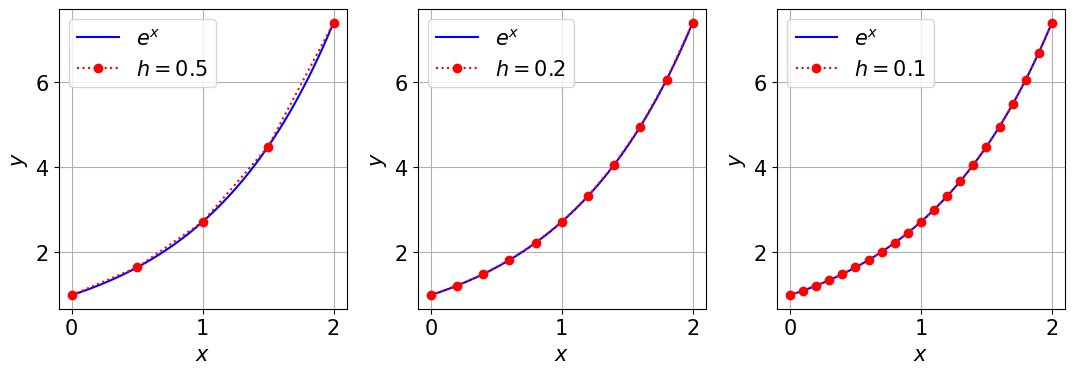

In [115]:
def f(x, y): #y' = y 
    return y

x_true = np.linspace(0, 2, 200)
y_true = np.exp(x_true)

plt.figure(figsize=[11, 4])

n_divs = [5, 11, 21]
for i, n_div in enumerate(n_divs):
    plt.subplot(1, len(n_divs), i + 1)
    x = np.linspace(0, 2, n_div)
    plt.plot(x_true, y_true, "-b", x, rk4_ode(f, 1, x), "o:r")
    plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
    plt.grid()
    plt.xlabel("$x$")
    plt.ylabel("$y$")

plt.tight_layout()
plt.show()

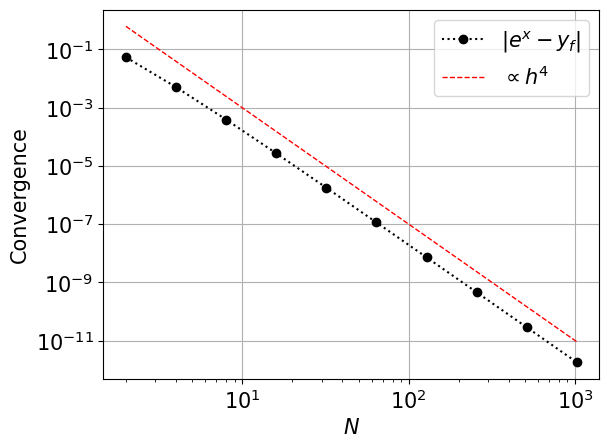

In [113]:
def f(x, y):
    return y

N = [2**i for i in range(1, 11)]
error = [
    abs(np.exp(2) - rk4_ode(f, 1, np.linspace(0, 2, n + 1))[-1])
    for n in N
]
    
plt.figure()

plt.loglog(N, error, 'o:k', label="$|e^x - y_f|$")
plt.loglog(N, [10 / n**4 for n in N], '--r', lw=1, label="$\\propto h^4$")
plt.grid()
plt.xlabel("$N$")
plt.ylabel("Convergence")
plt.legend()

plt.show()